# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"
full_data =pd.read_csv(output_data_file)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

#empty lists for values to be extracted. 
name_of_city =[]
cloudiness =[]
country =[]
date =[]
humidity =[]
lat =[]
lng =[]
temp_max =[]
wind_speed =[]

#setting the count for the record and record set.
record_number =1
record_set = 1

#for the total number of cities, we are updating the query url with the name of the city in each iteration as
#the code runs through all of the cities.

#we then put each response into the query_response variable. We then take each field value from the response and 
#add into the lists that we defined above for all fields. 

print('''
-------------------------------
Beginning Of Data Retrieval
-----------------------------''')
for city in cities:
    
    try:
        query_url = base_url + "&appid=" + weather_api_key + "&q=" + city
        query_response = requests.get(query_url).json()
        
        name_of_city.append(query_response["name"])
        cloudiness.append(query_response["clouds"]["all"])
        country.append(query_response["sys"]["country"])
        date.append(query_response["dt"])
        humidity.append(query_response["main"]["humidity"])
        lat.append(query_response["coord"]["lat"])
        lng.append(query_response["coord"]["lon"])
        temp_max.append(query_response["main"]["temp_max"])
        wind_speed.append(query_response["wind"]["speed"])
   #if the city was foound, print the city name and number.     
        print(f"Processing record {record_number} Of Set {record_set}:| {name_of_city}.")
        record_number += 1
    #if not skip and continue...    
    except (KeyError, IndexError):
        print("City Not Found,Skipping......")
      #limit the API calls to 50 records of city and then wait and start creating the next set of cities list. 
    
    if record_number==50:
        record_set +=1
        record_number =1
        time.sleep(10)
print('''
-------------------------------
End Of Data Retrieval
-----------------------------''')


-------------------------------
Beginning Of Data Retrieval
-----------------------------
Processing record 1 Of Set 1:| ['Punta Arenas'].
Processing record 2 Of Set 1:| ['Punta Arenas', 'Ushuaia'].
Processing record 3 Of Set 1:| ['Punta Arenas', 'Ushuaia', 'Bredasdorp'].
Processing record 4 Of Set 1:| ['Punta Arenas', 'Ushuaia', 'Bredasdorp', 'Albany'].
City Not Found,Skipping......
Processing record 5 Of Set 1:| ['Punta Arenas', 'Ushuaia', 'Bredasdorp', 'Albany', 'Saint-Philippe'].
Processing record 6 Of Set 1:| ['Punta Arenas', 'Ushuaia', 'Bredasdorp', 'Albany', 'Saint-Philippe', 'Camacha'].
Processing record 7 Of Set 1:| ['Punta Arenas', 'Ushuaia', 'Bredasdorp', 'Albany', 'Saint-Philippe', 'Camacha', 'Banjar'].
Processing record 8 Of Set 1:| ['Punta Arenas', 'Ushuaia', 'Bredasdorp', 'Albany', 'Saint-Philippe', 'Camacha', 'Banjar', 'Hilo'].
Processing record 9 Of Set 1:| ['Punta Arenas', 'Ushuaia', 'Bredasdorp', 'Albany', 'Saint-Philippe', 'Camacha', 'Banjar', 'Hilo', 'Hermanus'].


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
#converting the field data values into a dataframe. 
full_weather_data =pd.DataFrame({"City":name_of_city,
                                "Country":country,
                                "Cloudiness":cloudiness,
                                "Date":date,
                                "Humidity":humidity,
                                "Lat":lat,
                                "Lng":lng,
                                "Max Temp":temp_max,
                                "Wind Speed":wind_speed})
full_weather_data =full_weather_data.dropna()
full_weather_data.head(700)

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,CL,83,1584427011,75,-53.15,-70.92,46.40,14.99
1,Ushuaia,AR,40,1584427011,70,-54.80,-68.30,44.60,16.11
2,Bredasdorp,ZA,64,1584427011,87,-34.53,20.04,66.00,4.70
3,Albany,US,90,1584426927,59,42.60,-73.97,37.40,14.99
4,Saint-Philippe,RE,75,1584427011,74,-21.36,55.77,86.00,10.29
...,...,...,...,...,...,...,...,...,...
558,Oussouye,SN,31,1584427231,63,12.48,-16.55,67.62,8.34
559,Port Blair,IN,94,1584427231,73,11.67,92.75,83.46,10.74
560,Okha,RU,100,1584427231,78,53.57,142.95,22.26,6.40
561,Makat,KZ,65,1584427232,40,47.65,53.35,37.92,5.84


In [21]:
full_weather_data.to_csv("cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

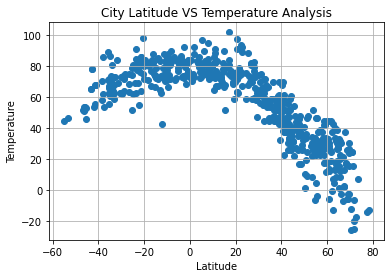

In [22]:
#scatter plot for City latitude vs Temperature. 
plt.scatter(full_weather_data["Lat"], full_weather_data["Max Temp"], marker='o')

plt.title("City Latitude VS Temperature Analysis")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

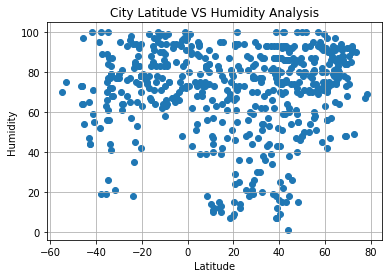

In [23]:
#scatter plot for City Latitude vs Humidity
plt.scatter(full_weather_data["Lat"], full_weather_data["Humidity"], marker='o')

plt.title("City Latitude VS Humidity Analysis")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

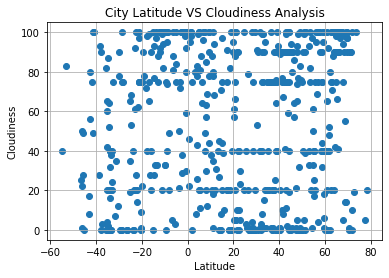

In [24]:
#scatter plot for City Latitude vs cloudiness
plt.scatter(full_weather_data["Lat"], full_weather_data["Cloudiness"], marker='o')

plt.title("City Latitude VS Cloudiness Analysis")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

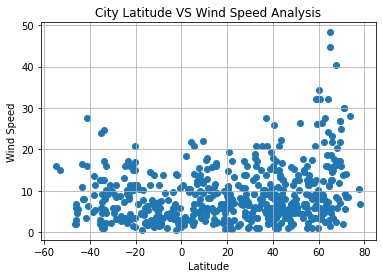

In [25]:
#scatter plot for City Latitude vs Wind Speed
plt.scatter(full_weather_data["Lat"], full_weather_data["Wind Speed"], marker='o')

plt.title("City Latitude VS Wind Speed Analysis")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression